<a href="https://colab.research.google.com/github/OmkarPatkar/Traffic-sign-Classification/blob/master/traffic_signs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**traffic_signs_classification**


### **Import Libraries**

In [1]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
#Conv2D: to extract the features,help with blurring, sharpening, and edge ditection
#Maxpooling2D: helps to reduce img dimensionality without losing information or its features.

from keras.layers import  Dense, Dropout, Flatten
#Dense: fully connected neural net, each i/p node connected to each o/p node
#Dropout: to reduce overfitting, it drop off some of the neurons while learing the process
#Flatten: it transforms a 2 dimensional matrix of features into a vector that can be fit into a fully connected neural network

from keras.optimizers import Adam
#Adam: it is optimizer to compile our model

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# cloning repo containing the traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [3]:
# list dataset contents
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
#load the dataset
data = pd.read_csv("/content/german-traffic-signs/signnames.csv")


In [5]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [6]:
#loading pickled dataset
with open("german-traffic-signs/train.p", mode='rb') as training:
  train = pickle.load(training)

with open("german-traffic-signs/valid.p", mode='rb') as validation:
  valid = pickle.load(validation)

with open("german-traffic-signs/test.p", mode='rb') as testing:
  test = pickle.load(testing)


In [7]:
#features contain images and labels contains labels of the images 
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [8]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)
#it prints shape of the data, of size 32 * 32, and the last value(3) means the data contains colored imgs

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label = 18


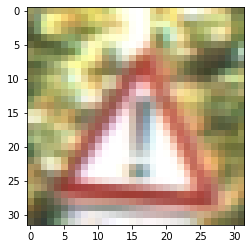

In [9]:
index = np.random.randint(1, len(x_train))
plt.imshow(x_train[index])
print("image label = {}".format(y_train[index]))

# Image Pre-processing

### 1. Converting to grayscale
### 2. Histogram Equalization
### 3. Normalization

In [10]:
#shuffle the data
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [11]:
def preprocessing(img):
  #converting imgs to grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #applying histogram equalization to standardized lighting of all imgs
  img = cv2.equalizeHist(img)
  #normalize pixel values b/w 0 and 1 by dividing the by 255
  img = img/255
  return img

In [12]:
#apply prepocessing to entire array, map function iterates to an array and perform processing to imgs
x_train_processed = np.array(list(map(preprocessing, x_train)))
x_validation_processed = np.array(list(map(preprocessing, x_validation)))
x_test_processed = np.array(list(map(preprocessing, x_test)))

In [13]:
x_train_processed = x_train_processed.reshape(34799,32,32,1)
x_test_processed = x_test_processed.reshape(12630,32,32,1)
x_validation_processed = x_validation_processed.reshape(4410,32,32,1)

In [14]:
print(x_train_processed.shape)
print(x_test_processed.shape)
print(x_validation_processed.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


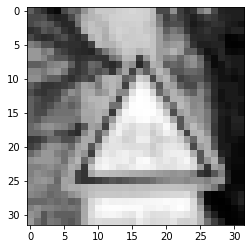

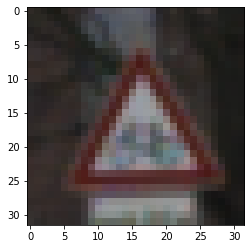

In [15]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train_processed[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i].squeeze())

# Build Deep Convolution Neural Network Model 

In [16]:
model = Sequential()

# add the convolutional layer
# filters, size of filters,input_shape,activation_function
#extract 32 features and iterate through 5*5 pixels
model.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (32, 32, 1)))

# pooling layer
#reduce the size to half maintaining the importance of features
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#to avoid the overfitting
model.add(Dropout(0.25))

# add another convolutional layer
model.add(Conv2D(64,(5,5), activation = 'relu'))

# add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))

# defining the ouput layer of our network
model.add(Dense(43, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [17]:
#compile our model 
model.compile(Adam(lr = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
#fit our model
history = model.fit(x_train_processed,
                    y_train,
                    batch_size = 500,
                    epochs = 50,
                    verbose = 1,
                    validation_data = (x_validation_processed, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 4s 111us/step - loss: 3.5655 - accuracy: 0.0616 - val_loss: 3.4848 - val_accuracy: 0.1592
Epoch 2/50
34799/34799 [==============================] - 1s 32us/step - loss: 3.2983 - accuracy: 0.1549 - val_loss: 3.0862 - val_accuracy: 0.3145
Epoch 3/50
34799/34799 [==============================] - 1s 32us/step - loss: 2.7680 - accuracy: 0.3037 - val_loss: 2.4650 - val_accuracy: 0.4032
Epoch 4/50
34799/34799 [==============================] - 1s 32us/step - loss: 2.2813 - accuracy: 0.4050 - val_loss: 2.0345 - val_accuracy: 0.4839
Epoch 5/50
34799/34799 [==============================] - 1s 32us/step - loss: 1.9459 - accuracy: 0.4720 - val_loss: 1.6959 - val_accuracy: 0.5551
Epoch 6/50
34799/34799 [==============================] - 1s 32us/step - loss: 1.6960 - accuracy: 0.5221 - val_loss: 1.4447 - val_accuracy: 0.6181
Epoch 7/50
34799/34799 [==============================] - 1s 32us/st

# Evaluate Performance of the model

In [19]:
score = model.evaluate(x_test_processed,y_test)
print('Test accuracy',score[1])

12630/12630 [==============================] - 1s 59us/step
Test accuracy 0.9171813130378723


In [20]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 0, 'epochs')

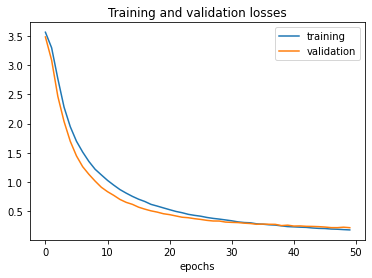

In [21]:
#plot Training and validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

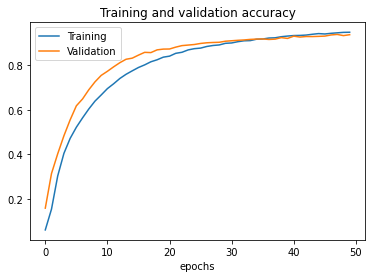

In [22]:
#plot Training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [23]:
#predict on test data
prediction = model.predict_classes(x_test_processed)
y_true_label = y_test

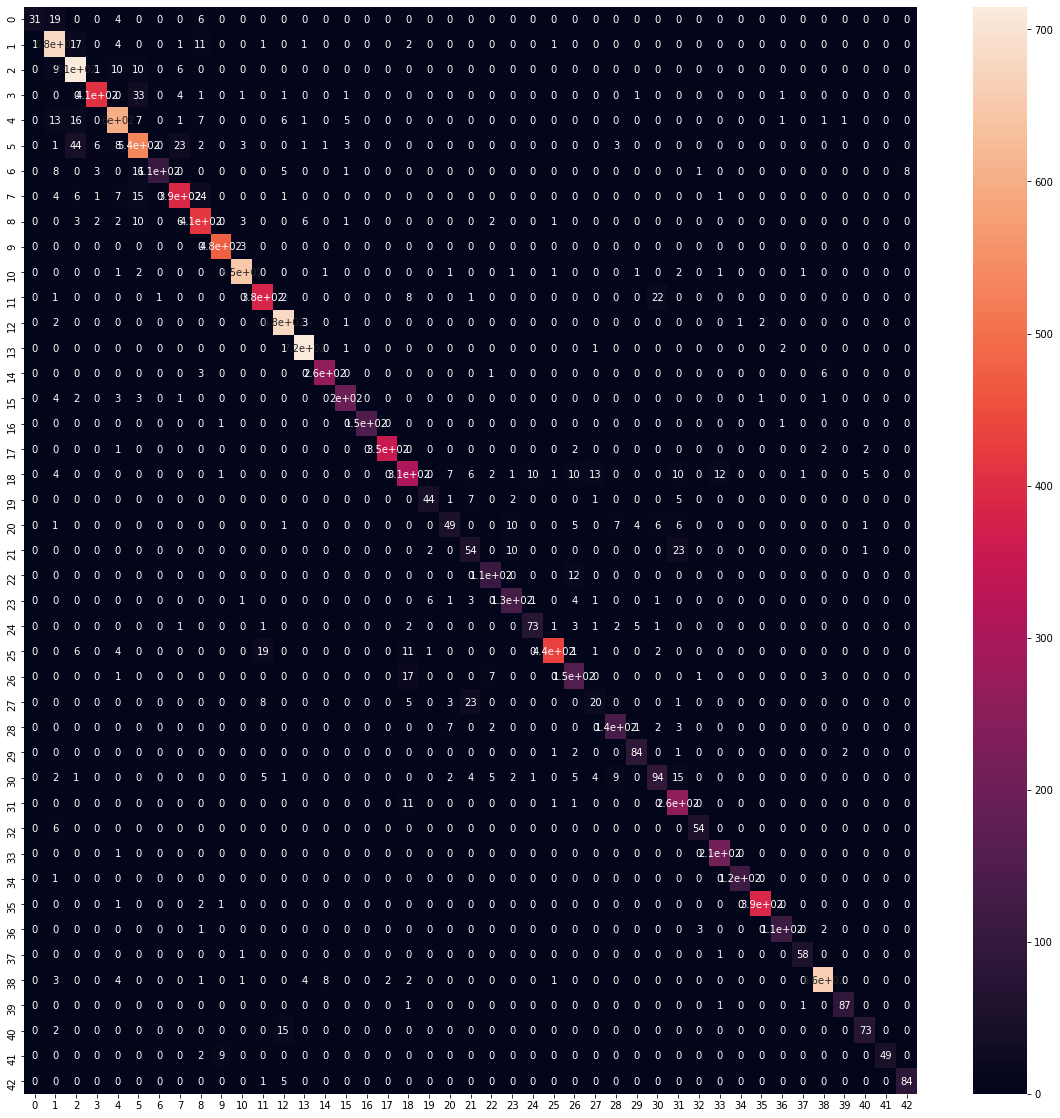

In [24]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label, prediction)
plt.figure(figsize = (20,20))
sns.heatmap(matrix, annot = True)

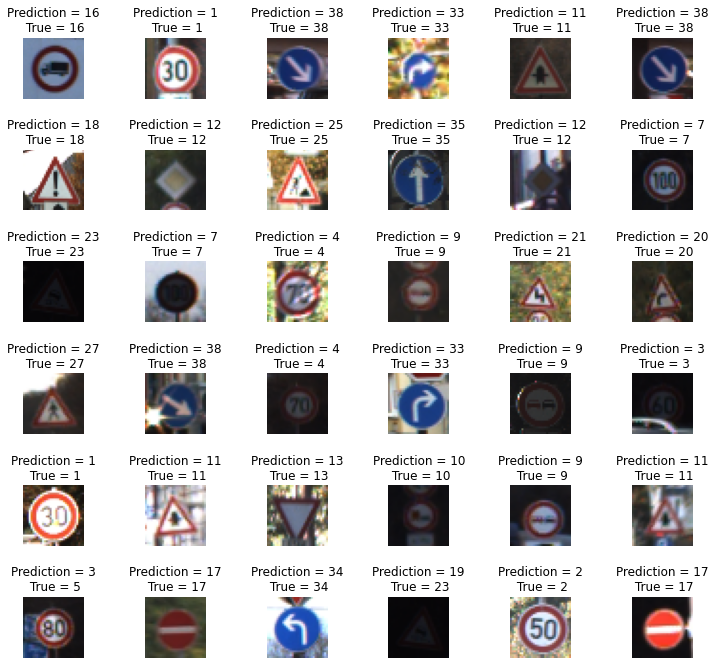

In [25]:
#plot a subplot 
l = 6
w = 6
fig, axes = plt.subplots(l, w, figsize = (12, 12))
axes = axes.ravel() # flatten our matrix into 36*36
for i in range(0, l*w):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(prediction[i], y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [26]:
#save our model as traffic_model
model.save('traffic_model.h5')